In [237]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from os import listdir
%matplotlib inline

In [238]:
images = [i for i in listdir('Output/Demo/Demo files')]
images = [i.replace('_NaturalOutline.png','.tif') for i in images]

data_file = 'Output/Results-First-Pass-05-20-2020/SpotAsssayQuant_NaturalSpots_first_pass.csv'
#needs_redone_dir = 'Output/Results-First-Pass-05-20-2020/Needs Redone'
filenames_file = 'Output/Results-First-Pass-05-20-2020/SpotAsssayQuant_Image_first_pass.csv'


df = pd.read_csv(data_file)
filenames = pd.read_csv(filenames_file)
df.drop(columns=['Number_Object_Number', 'Intensity_MeanIntensity_CropGray'], inplace = True)
df = df.rename(columns = {'AreaShape_Area': 'Area','ObjectNumber':'Row'})


In [239]:
def get_img_name (row):
    return(filenames.loc[row['ImageNumber']-1,'FileName_original'])

In [256]:
data=df.groupby([df.ImageNumber,pd.cut(df.Row, [1,5,10,15,20,25,30,35], include_lowest=True, labels = ['Row1','Row2','Row3','Row4','Row5','Row6','Row7'])])['Area'].sum().rename("binArea").reset_index()
data['ImageName'] = data.apply(get_img_name, axis =1)
data = data[['ImageNumber', 'ImageName', 'Row', 'binArea']]

In [257]:
data_pivot = data.pivot(index = "ImageName", columns = 'Row', values = 'binArea')
# labels = ['Row1','Row2','Row3','Row4','Row5','Row6','Row7'])

In [258]:
data

,ImageNumber,ImageName,Row,binArea
0,1,12D rapa crop 5-28-18.tif,Row1,0.0
1,1,12D rapa crop 5-28-18.tif,Row2,0.0
2,1,12D rapa crop 5-28-18.tif,Row3,0.0
3,1,12D rapa crop 5-28-18.tif,Row4,0.0
4,1,12D rapa crop 5-28-18.tif,Row5,133.0
...,...,...,...,...
1591,229,wt ura- crop 5-13-18.tif,Row3,0.0
1592,229,wt ura- crop 5-13-18.tif,Row4,13.0
1593,229,wt ura- crop 5-13-18.tif,Row5,8.0
1594,229,wt ura- crop 5-13-18.tif,Row6,0.0


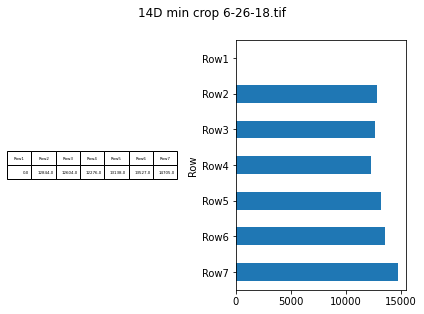

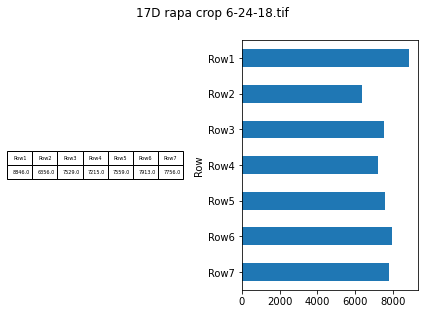

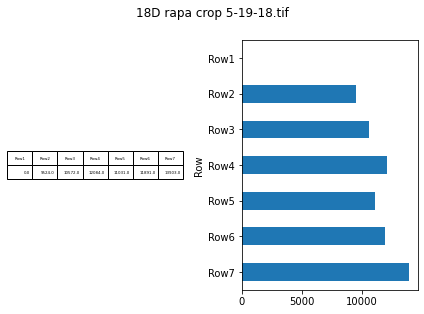

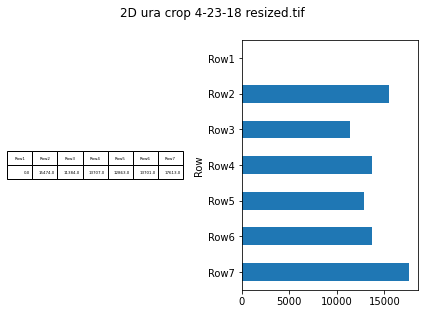

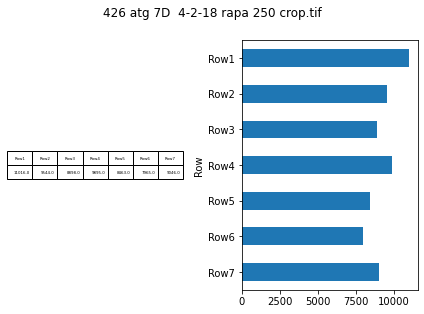

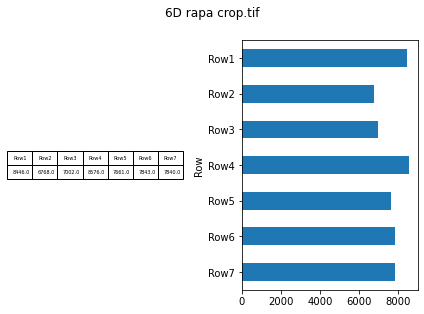

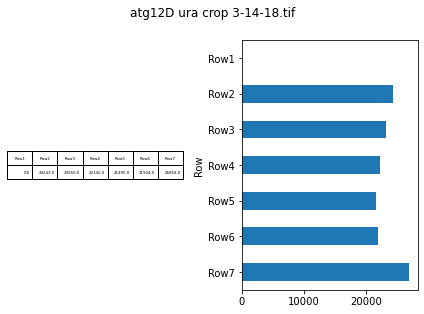

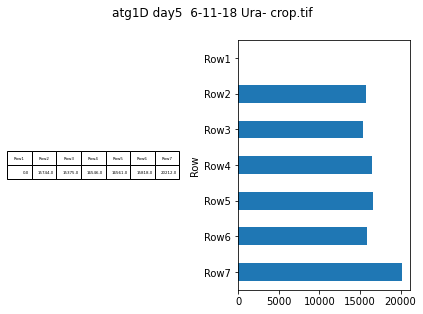

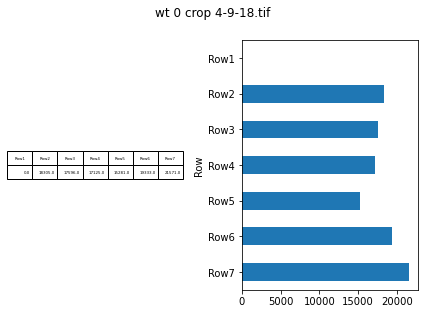

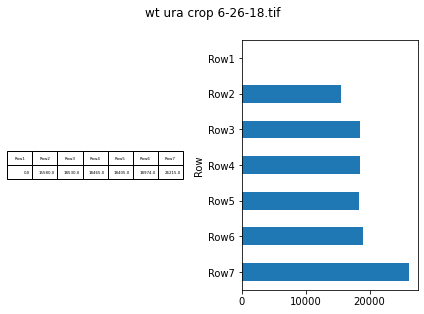

In [259]:
with PdfPages('Output/Demo/SpotAssayGraphedResults.pdf') as pdf:
    for img in images:
        fig, ax = plt.subplots(1,2)
        fig.suptitle(img, y = 1.08)
        fig.patch.set_visible(False)
        piv = data_pivot.loc[[img]]

        ax[0].axis('off')
        ax[0].axis('tight')
        ax[0].table(cellText=piv.values, colLabels=piv.columns, loc='center')

        plot = data[data['ImageName']==img].plot(ax = ax[1], kind='barh', x = 'Row', y = 'binArea')
        plt.gca().invert_yaxis() 
        ax[1].get_legend().remove()

        fig.tight_layout()
        plt.show()
        pdf.savefig(fig,bbox_inches='tight')

